### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #9

There are several deep learning frameworks in Python.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="100"/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" width="40"/><img src="https://assets-global.website-files.com/621e749a546b7592125f38ed/62277da165ed192adba475fc_JAX.jpg" width="100"/>

In this Lab, we will use PyTorch [PyTorch documentation](https://pytorch.org/docs/stable/index.html)

In [1]:
%%capture
!git clone https://github.com/donlapark/ds352-labs.git

In [2]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# Tensor basics

## Basic tensor creation

### Creating a scalar (1D) tensor

In [3]:
# Tensor จะมีลักษณะคล้าย Numpy Array ซึ่ง Tensor สามารถย้ายไปประมวลผลใน CPU กับ GPU ไปมาได้
a = torch.tensor(8)

### Convert a tensor to scalar

In [4]:
# การเปลี่ยนจาก Tensor ให้เป็นตัวเลขธรรมดา
a.item()

8

### Creating 2D tensor

In [5]:
# ลองทำให้เป็น Matrix
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(A)

tensor([[1, 2, 3],
        [4, 5, 6]])


## Tensor and Numpy

### Convert from tensor to numpy array

In [6]:
# การแปลงให้ Matrix เป็น Numpy Array แบบธรรมดา
A.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

### Convert from numpy array to tensor

In [7]:
B = np.array([[1, 2], [3, 4]])

# วิธีสร้าง Tensor จาก Numpy Array B
C = torch.from_numpy(B)
print(C)

tensor([[1, 2],
        [3, 4]])


## Basic operations

In [8]:
# เอา Tensor C มา +,-,*,/ ได้หมด
D = C - 20

E = C*10

print(D)
print(E)

tensor([[-19, -18],
        [-17, -16]])
tensor([[10, 20],
        [30, 40]])


### Matrix multiplication

In [9]:
# การคูณระหว่าง Matrix D กับ Matrix E
torch.matmul(D, E)
torch.mm(D, E)
D @ E

tensor([[ -730, -1100],
        [ -650,  -980]])

### Matrix transpose

In [10]:
D.t()

tensor([[-19, -17],
        [-18, -16]])

## Creating a specific type of tensor

In [11]:
# สร้าง Matrix ที่มีแต่เลข 0
print(torch.zeros(2,3))

# สร้าง Matrix ที่มีแต่เลข 1
print(torch.ones(2,3))

# สร้าง Matrix จากการสุ่มที่มีค่าตาม Normal Distribution
print(torch.rand(2,3))

print(torch.randn(2,3))  # sample each number from N(0, 1)

# สร้าง Matrix ที่มีค่าตั้งแต่ 0-8
print(torch.arange(9))

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.5475, 0.5132, 0.8945],
        [0.6881, 0.6564, 0.4933]])
tensor([[-0.6537, -1.3836,  3.1843],
        [ 0.1282, -1.0500,  0.3367]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


## Tensor's shape

### Checking the shape of a tensor

In [12]:
F = torch.zeros((4, 5))
print(F)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [13]:
F.shape

torch.Size([4, 5])

In [14]:
F.size()

torch.Size([4, 5])

### Changing the shape of a tensor

In [15]:
G = torch.arange(6)
print(G)

tensor([0, 1, 2, 3, 4, 5])


In [16]:
# view and reshape
print(G.reshape(2, 3)) # การเปลี่ยนขนาดให้เป็น 2 แถว 3 คอลัมน์
print(G.view(2, 3)) # ได้ผลลัพธ์เหมือนกัน แต่ Reshape จะใช้ RAM เยอะกว่าแต่จะเร็วกว่า
# ส่วน View จะใช้ RAM น้อยกว่า แต่จะรันนานกว่า

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 1, 2],
        [3, 4, 5]])


In general, use `reshape`, but if you are worried about the memory usage, use `view`.

## PyTorch and GPU

check if GPU is available

In [ ]:
# การเช็คว่าตอนนี้เครื่องเราใช้ GPU อยู่หรือเปล่า
torch.cuda.is_available()

False

In [ ]:
# เช็คว่าตอนนี้ Tensor อยู่ใน GPU หรือ CPU
Q = torch.tensor([1, 2, 3])
print(Q.device)

cpu


In [ ]:
# .cuda จะเป็นการย้าย Q ของเราจาก CPU ไปอยู่ใน GPU (คงจะรันไม่ได้ถ้ากำลังใช้ CPU อยู่)
R = Q.cuda()
print(Q.device)
print(R.device)

In [ ]:
# ถ้าเรากำลังใช้ CPU อยู่ แต่ R อยู่ใน GPU
# R.numpy() >>> ERROR เปลี่ยนเป็น Numpy ไม่ได้

# ดังนั้น เราจึงต้องแปลงให้มาอยู่ใน CPU ก่อน
R.cpu().numpy()

## Training a neural network in PyTorch

### Chihuahua or Muffin?

<center><img src="https://donlapark.pages.dev/229352/lab09-preview.jpg" width="500"/></center>

### 1. Data preparation

#### Load images, resize them to 128x128, and normalize the pixels to be in 0 - 1 range

In [17]:
transform = transforms.Compose([transforms.Resize((128, 128)), # ปรับขนาดรูปภาพทุกรูปให้เท่ากันก่อน
                                transforms.ToTensor()])  # transform pixels to be in 0 - 1 range

dataset = dataset = datasets.ImageFolder(root="ds352-labs/lab09-data/train",
                                         transform=transform)

#### Split the dataset into training (80%), validation (20%)

In [18]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
# ใช้ฟังก์ชัน Torch มาแบ่ง Training set 80 % กับ Validation set 20 %
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#### Load the datasets into DataLoader

In [19]:
# ฟังก์ชัน DataLoader ใช้ในการแบ่งข้อมูลในการใส่ข้อมูลทีละ 10 รูป และก็ Shuffle ข้อมูลด้วย
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=10,
                          shuffle=True)
# Validation set เราไม่จำเป็นต้อง Shuffle
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=len(val_dataset),
                        shuffle=False)

#### Do the same for the test images

In [20]:
test_dataset = datasets.ImageFolder(root="ds352-labs/lab09-data/test",
                                    transform=transform)
# Test set ก็ทำเช่นเดียวกัน ไม่ต้อง Shuffle
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=len(test_dataset),
                         shuffle=False)

#### Looking at the first minibatch

In [21]:
# การเปลี่ยนจาก Loader ให้เป็นทีละ 10 batch
train_batches = iter(train_loader)
# อยากจะดู 10 batch ต่อไปใช้ next
X, y = next(train_batches)

print(X.shape)  # (batch_size, colour_channel, height, weight)
print(y.shape)

torch.Size([10, 3, 128, 128])
torch.Size([10])


#### Visualize the first four images in the batch

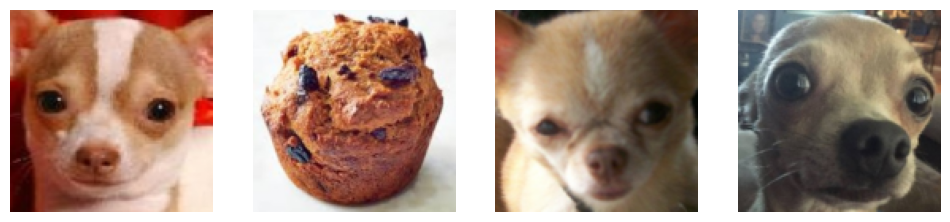

tensor([0, 1, 0, 0])


In [22]:
X = X[:4]  # Select the first 4 images
X = X.numpy().transpose(0, 2, 3, 1)  # Convert from (B, C, H, W) to (B, H, W, C)

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(X[i])
    axes[i].axis('off')
plt.show()

print(y[:4])

### 2. Build a simple logistic regression

<center><img src="https://donlapark.pages.dev/229352/logistic.png" width="300"/></center>

The most important component of the model class is the `__init__` method and the `forward` method.  
  
[Activation functions in PyTorch](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). The most important ones are [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html), [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html), [Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html), [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html).

In [23]:
# nn.Module มาจาก torch
class SimpleLogisticRegression(nn.Module):
  def __init__(self):
    # Initialize Layer ต่าง ๆ
    super(SimpleLogisticRegression, self).__init__()
    # สร้าง Attribute แรกที่บ่งบอก Layer ขนาดทุกโนด(128x128x3) ส่งไปยังโนดเดียว (1)
    self.linear = nn.Linear(128 * 128 * 3, 1)
    # สร้าง Activation Function
    self.act = nn.Sigmoid()


  def forward(self, x):
    x = self.linear(x.view(-1, 128*128*3))
    x = self.act(x)
    return x

### 3. Initialize training components

#### Initialize the model and loss function

[Loss functions in PyTorch](https://pytorch.org/docs/stable/nn.html#loss-functions). Most important ones are [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html), [Binary cross, entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), [Categorical cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

In [24]:
model = SimpleLogisticRegression()
# BCELoss is used for ทำการแบ่งกลุ่มสองกลุ่ม
criterion = nn.BCELoss()

#### Manually setting initial weights to zero for demonstration

In [25]:
with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_() # Set ทุกอย่างให้มีค่าเป็น 0 ก่อน
          layer.bias.zero_()

#### Create two lists to collect training and validation losses

In [26]:
# List to store the loss values for plotting
train_losses = [] # ระหว่างที่ Train ก็จะมีการเก็บค่า Loss ไปเรื่อย ๆ
val_losses = []

#### Specify the learning rate

In [27]:
learning_rate = 1e-3

### 4. Training the model with gradient descent

#### Convert the dataloader into minibatches

In [28]:
train_batches = iter(train_loader)

#### Make a prediction on the minibatch (Forward pass)

In [29]:
X, y = next(train_batches)

y_hat = model(X)
y_hat = y_hat[:, 0] # ปรับขนาด y ให้เท่ากัน
y = y.to(torch.float32) # เปลี่ยนชนิดข้อมูล Integer ให้เป็น float

#### Calculate the loss function

Recall that `criterion()` is our binary cross-entropy loss (`BCELoss`).

In [30]:
# Compute the loss
loss = criterion(y_hat, y)
# เอาค่า loss ที่ได้ไปเก็บ (แปลงให้เป็น item ก่อนเพราะเป็น tensor)
train_losses.append(loss.item())

#### Calculate the gradient (Backward pass)

In [31]:
# Backward pass: compute the gradient of the loss w.r.t. model parameters
loss.backward() # เป็น Method หนึ่งในการคำนวณ Gradient

In [32]:
# model.parameters()
# การดู Parameter ของ Layer แรก
list(model.parameters())[0]

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)

In [33]:
# การดู Gradient ที่ได้ของ parameter ชุดนี้
list(model.parameters())[0].grad

tensor([[0.0620, 0.0541, 0.0422,  ..., 0.0806, 0.0778, 0.0710]])

#### Perform a gradient descent step

Careful! We must not include this step in the gradient calculation, hence the use of `with torch.no_grad()`.

In [34]:
# Manually update the weights using the gradient descent rule
with torch.no_grad():
  for param in model.parameters():
    param = param - learning_rate * param.grad

# Zero the gradients after updating
model.zero_grad() # ทำให้ Gradient ของทุกตัวเป็น 0 หมด เพื่อจะได้ไปทำนายใน Step ต่อไป

#### Do the same for the validation set

Careful! Anything in the validation step must not be included in the gradient calculation, hence the use of `with torch.no_grad()`.

In [35]:
with torch.no_grad():
  for X, y in val_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)
    val_loss = criterion(y_hat, y)
    val_losses.append(val_loss.item())

In [36]:
print(train_losses) # Loss function ยิ่งน้อยยิ่งดี แต่ตีความได้ยากกว่า Accuracy
print(val_losses)

[0.6931471824645996]
[0.6931471228599548]


#### Combine everything together.

Repeat the previous steps for 20 **epochs** and plot the training and validation losses.

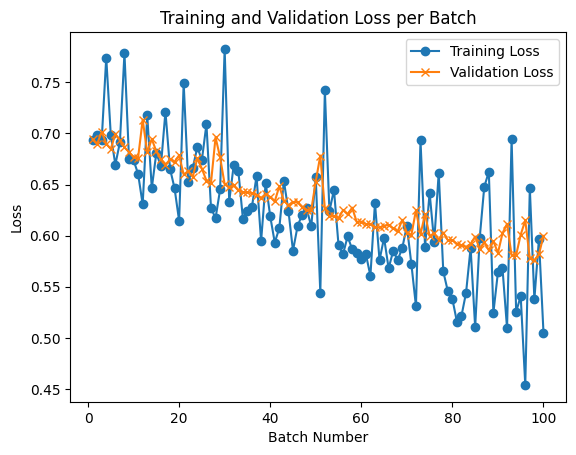

In [37]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-4

for epoch in range(10):
  for X, y in train_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

ถ้า Validation Loss ไม่ลดลงแบบนี้ ให้ลองปรับ Learning rate ดู

# Exercise

In this exercise, we will add more layers to our classification model.

<img src="https://donlapark.pages.dev/229352/lab09-architecture.png" width="450"/>

1. Create a neural network with 3 hidden layers as shown in the picture.

2. Train the model with learning rate = 1e-2, 1e-3, 1e-4, 1e-5, and answer the following questions.
    2.1 What value of learning rate do you **think** is the best? Please explain your reason.
    2.2 What happens to the training losses if your learning rate is too large?
    2.3 What happens to the training losses if your learning rate is too small?

3. After finish training your model. Make the predictions on the test set and compute the accuracy. You may use the provided code below.

4. Use `plt.imshow()` to display at least four images that are incorrectly classified by this model.

### 1. Create a neural network with 3 hidden layers as shown in the picture.

In [40]:
class SimpleLogisticRegression(nn.Module):
  def __init__(self):
    super(SimpleLogisticRegression, self).__init__()
    # Input ไปยัง 128
    self.linear1 = nn.Linear(3*128*128, 128)
    self.act1 = nn.ReLU()
    # 128 ไปยัง 64
    self.linear2 = nn.Linear(128, 64)
    self.act2 = nn.ReLU()
    # 64 ไปยัง 32
    self.linear3 = nn.Linear(64, 32)
    self.act3 = nn.ReLU()
    # 32 ไปยัง Layer สุดท้าย Sigmoid
    self.linear4 = nn.Linear(32, 1)
    self.act4 = nn.Sigmoid()

  def forward(self, x):
    x = self.linear1(x.view(-1, 3*128*128))
    x = self.act1(x)
    x = self.linear2(x)
    x = self.act2(x)
    x = self.linear3(x)
    x = self.act3(x)
    x = self.linear4(x)
    x = self.act4(x)
    return x

### 2. Train the model with learning rate = 1e-2, 1e-3, 1e-4, 1e-5, and answer the following questions.
    2.1 What value of learning rate do you **think** is the best? Please explain your reason.
    2.2 What happens to the training losses if your learning rate is too large?
    2.3 What happens to the training losses if your learning rate is too small?

#### 2.1 What value of learning rate do you **think** is the best? Please explain your reason.
จากการลอง Train Model ด้วยค่า Learning rate = 1e-2, 1e-3, 1e-4, และ 1e-5 จึงคิดว่าค่า Learning rate = 1e-3 เป็นค่า Learning rate ที่ดีที่สุด เนื่องจากมีค่า Loss function ของ Validation loss ในระหว่างการ Train ที่ลดลงเรื่อย ๆ ซึ่งมีความสมดุลที่สุด (ไม่ลดลงเร็วเกินไป หรือค่อย ๆ เพิ่มขึ้น) เมื่อเทียบกับค่า Learning rate อื่น ๆ

#### 2.2 What happens to the training losses if your learning rate is too large?
ถ้า Learning rate ใหญ่เกินไป เช่น Learning rate = 1e-2 ค่า Loss function ของ Validation loss จะลดลงอย่างรวดเร็วจนทำให้ไม่สามารถลดลงได้อีกเพราะ Learning rate ใหญ่เกินไป ไม่มีความคงเส้นคงวา อีกทั้งยังทำให้ค่า Training loss ในการ Train แต่ละครั้งจะผันผวนไปมาและแตกต่างกันมาก สังเกตได้จากการ Plot ของ 1e-2 ที่ Training loss จะกระโดดไปมาอย่างผิดปกติ

#### 2.3 What happens to the training losses if your learning rate is too small?
ถ้า Learning rate เล็กเกินไป เช่น Learning rate = 1e-5 ค่า Loss function ของ Validation loss จะลดลงอย่างช้ามากจนสามารถสังเกตได้ชัดเจนว่าค่า Loss function นั้นมีขนาดใหญ่มาก (ประมาณ 4.6) ซึ่งการจะทำให้ได้ค่า Loss function ที่ต่ำนั้นจะต้องใช้เวลาในการ Train นานมาก เป็นการบ่งบอกว่า Learning rate มีขนาดเล็กเกินไปนั้นเอง

#### Learning rate = 1e-2

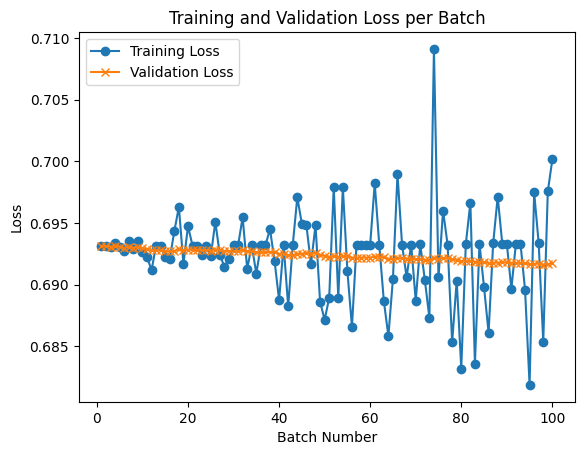

In [46]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-2

for epoch in range(10):
  for X, y in train_loader:
    # X = X.cuda()
    # y = y.cuda()
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    #train_losses.append(loss.cpu().item())
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        #val_losses.append(val_loss.cpu().numpy())
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

#X, y = next(iter(test_loader))
#X_gpu = X.cuda()
#y_hat = model(X)
#y_hat = y_hat.cpu().numpy()

#plt.imshow(X)
#print(y_hat)

#### Learning rate = 1e-3

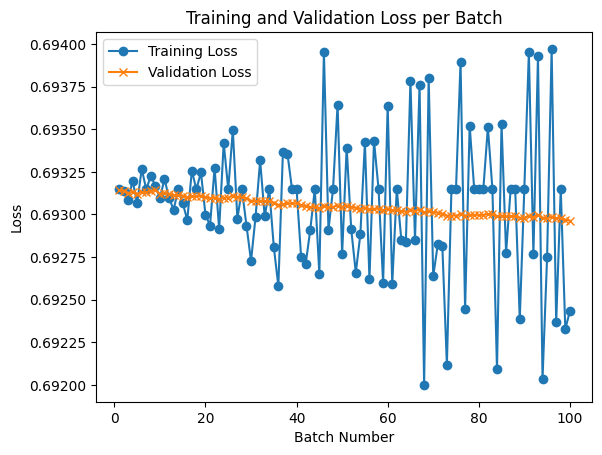

In [42]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-3

for epoch in range(10):
  for X, y in train_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Learning rate = 1e-4

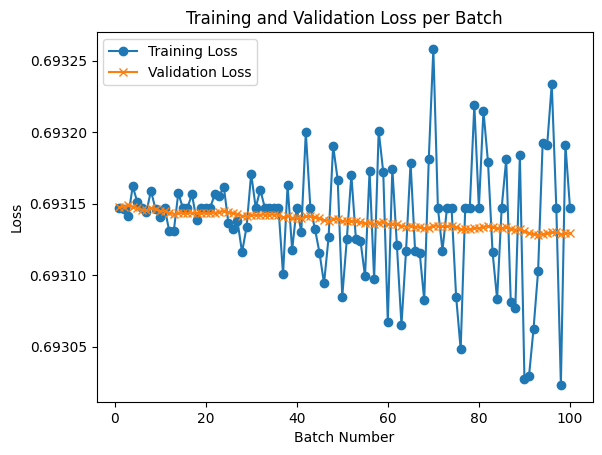

In [43]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-4

for epoch in range(10):
  for X, y in train_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Learning rate = 1e-5

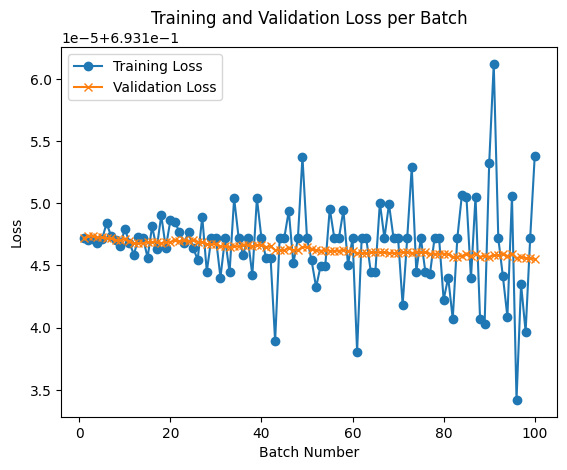

In [44]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-5

for epoch in range(10):
  for X, y in train_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3. After finish training your model. Make the predictions on the test set and compute the accuracy. You may use the provided code below.

In [61]:
# Use this code to calculate test accuracy
with torch.no_grad(): # ไม่มี Gradient มาอยู่ในการคำนวณ
  test_batches = iter(test_loader) # iterator
  X, y = next(test_batches) # Load Test set ให้เป็น batch เดียว

  # Make the predictions on the test set
  y_hat = model(X) # รับค่าทำนายมาจาก Model ที่ทำไว้
  y_hat = y_hat[:, 0] # เลือกเฉพาะค่าที่ทำนาย
  y_hat = (y_hat > 0.5).float()  # the predictions
  ##TODO: compute accuracy
  accuracy = (y_hat == y).float().mean()
  print(f"Accuracy = {accuracy.item()}")

Accuracy = 0.5666666626930237


ดังนั้น การทำนายบน Test set ซึ่งมีค่าความแม่นยำ = 0.5666666626930237

หมายความว่าโมเดลยังมีการทำนายเพื่อการจำแนกกลุ่ม Chihuahua กับ Muffin ที่ผิดพลาดอยู่

### 4. Use `plt.imshow()` to display at least four images that are incorrectly classified by this model.

In [62]:
# Find the indices that are incorrectly classified by model(X)
with torch.no_grad():
  test_batches = iter(test_loader)
  X, y = next(test_batches)
  y_hat = model(X)
  y_hat = y_hat[:, 0]
  y_hat = (y_hat > 0.5).float()
  incorrect_indices = (y_hat != y).nonzero()

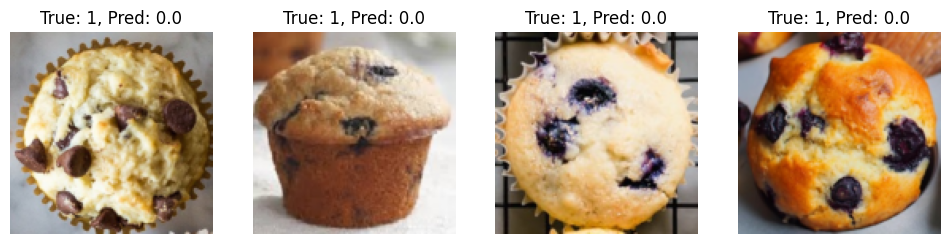

In [63]:
# Display some incorrectly classified images
num_images_to_display = min(4, len(incorrect_indices))
fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 4))
for i in range(num_images_to_display):
  idx = incorrect_indices[i].item()
  image = X[idx].numpy().transpose(1, 2, 0)  # Reshape image for display
  axes[i].imshow(image)
  axes[i].set_title(f"True: {y[idx]}, Pred: {y_hat[idx]}")
  axes[i].axis('off')
plt.show()

จากการจำแนกรูปภาพทั้ง 4 รูปด้วยโมเดลนี้พบว่า

Pred: 0.0 คือ ค่าที่โมเดลทำนายได้ว่ารูปนี้เป็นรูปสุนัข Chihuahua

True: 1 คือ ค่าที่ถูกต้องที่โมเดลควรจะทำนายได้ว่ารูปนี้เป็นรูปขนม Muffin